<a href="https://colab.research.google.com/github/trhgnhat/DS_DevC_CoderSchool/blob/master/Team_Nhat%26TA_Kickstarter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Team 3 - Kickstarter

![](https://a.kickstarter.com/assets/site/social/og-kickstarter-social-d58bfe030adf82001e25d3f7015eedb8ab84bc4bf9eeeeede5f8d8b0d02d641a.png)

_For more information about the dataset, read [here](https://www.kaggle.com/kemical/kickstarter-projects)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- The format of `launched` column is not consistent with `deadline` column
- Can you calculate the duration of the projects?
- Some projects in `launched` and `deadline` columns have year = 1970, which is way before Kickstarter was born!
- And more...


# Team members:
- Truong Hoang Nhat
- Nguyen Ngoc Tram Anh

# Data preprocessing

In [0]:
# Start your codes here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [0]:
df = pd.read_csv("https://dl.dropboxusercontent.com/s/niun2jvuo845lzc/kickstarter.csv?dl=0")


In [4]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [5]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [7]:
df.isna().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

Since the number of samples with Nan values of *name* is small amount. Then 4 samples will be drop out of the DataFrame

In [0]:
df = df.dropna(subset=["name"])

Drop the samples which have its goal larger than the amount of pledge but still in *Successful* state

In [0]:
df[(df.goal > df.pledged) & (df.state=="successful")].head()
df = df.drop(df[(df.goal > df.pledged) & (df.state=="successful")].index)

In [10]:
nan_df = df[df.isna().any(axis=1)]
nan_df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
169,1000694855,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,USD,2014-09-20,6500.0,2014-08-06 21:28:36,555.00,undefined,0,"N,0""",NaN,555.00,6500.00
328,100149523,Duncan Woods - Chameleon EP,Music,Music,AUD,2015-08-25,4500.0,2015-08-04 12:05:17,4767.00,undefined,0,"N,0""",NaN,3402.08,3211.53
632,1003023003,The Making of Ashley Kelley's Debut Album,Music,Music,USD,2015-04-09,3500.0,2015-03-10 20:06:13,3576.00,undefined,0,"N,0""",NaN,3576.00,3500.00
647,1003130892,Butter Side Down Debut Album,Music,Music,USD,2015-11-26,6000.0,2015-11-02 22:09:19,7007.80,undefined,0,"N,0""",NaN,7007.80,6000.00
749,1003629045,Chase Goehring debut EP,Music,Music,USD,2016-03-21,3000.0,2016-02-23 03:09:49,3660.38,undefined,0,"N,0""",NaN,3660.38,3000.00


In [11]:
nan_df.state.value_counts()

undefined     3562
successful     105
failed         105
canceled        22
suspended        2
live             1
Name: state, dtype: int64

In [12]:
nan_df.backers.value_counts()

0    3797
Name: backers, dtype: int64

*backers* is 0 but still *successful*?

In [13]:
nan_df.country.value_counts()

N,0"    3797
Name: country, dtype: int64

Most of nan sample are in "undefined" state. 

All of nan sample has *0* backer (who support by giving money)

whatever the state is, if it has no backer then there is *0* money pledged

all nan samples come from *N,0"* country. (anomynous country)

**DROP or NOT?**

In [14]:
print("percentage of Nan sample over the initial df:",len(nan_df)/len(df)*100)

percentage of Nan sample over the initial df: 1.0027677128339478


Since the nan sample are only ~1% of initial DF, then drop all nan samples are acceptable. 

In [15]:
non_nan_df = df.drop(nan_df.index)
non_nan_df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [16]:
non_nan_df.index = range(len(non_nan_df)) # reset indexes
non_nan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374855 entries, 0 to 374854
Data columns (total 15 columns):
ID                  374855 non-null int64
name                374855 non-null object
category            374855 non-null object
main_category       374855 non-null object
currency            374855 non-null object
deadline            374855 non-null object
goal                374855 non-null float64
launched            374855 non-null object
pledged             374855 non-null float64
state               374855 non-null object
backers             374855 non-null int64
country             374855 non-null object
usd pledged         374855 non-null float64
usd_pledged_real    374855 non-null float64
usd_goal_real       374855 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 42.9+ MB


In [0]:
non_nan_df["launched"] = pd.to_datetime(non_nan_df.launched)
non_nan_df["deadline"] = pd.to_datetime(non_nan_df.deadline)


In [0]:
non_nan_df["launched_year"] = non_nan_df.launched.apply(lambda x: x.year)
non_nan_df["launched_month"] = non_nan_df.launched.apply(lambda x: x.month)
non_nan_df["launched_day"] = non_nan_df.launched.apply(lambda x: x.day)
non_nan_df["launched_hour"] = non_nan_df.launched.apply(lambda x: x.hour)
non_nan_df["launched_minute"] = non_nan_df.launched.apply(lambda x: x.minute)
non_nan_df["launched_date"] = non_nan_df.launched.apply(lambda x: x.date())
non_nan_df["launched_time"] = non_nan_df.launched.apply(lambda x: x.time())

In [0]:
non_nan_df["deadline_year"] = non_nan_df.deadline.apply(lambda x: x.year)
non_nan_df["deadline_month"] = non_nan_df.deadline.apply(lambda x: x.month)
non_nan_df["deadline_day"] = non_nan_df.deadline.apply(lambda x: x.day)
non_nan_df["deadline_date"] = non_nan_df.deadline.apply(lambda x: x.date())
non_nan_df["deadline_time"] = non_nan_df.deadline.apply(lambda x: x.time())

In [0]:
non_nan_df["duration"] = (non_nan_df.deadline-non_nan_df.launched)
non_nan_df["days_duration"] = (non_nan_df.deadline-non_nan_df.launched).apply(lambda x: x.days)

In [43]:
non_nan_df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_year,launched_month,launched_day,launched_hour,launched_minute,launched_date,launched_time,deadline_year,deadline_month,deadline_day,deadline_date,deadline_time,days_duration
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,2015,8,11,12,12,2015-08-11,12:12:28,2015,10,9,2015-10-09,00:00:00,58
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,2017,9,2,4,43,2017-09-02,04:43:57,2017,11,1,2017-11-01,00:00:00,59
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,2013,1,12,0,20,2013-01-12,00:20:50,2013,2,26,2013-02-26,00:00:00,44
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,2012,3,17,3,24,2012-03-17,03:24:11,2012,4,16,2012-04-16,00:00:00,29
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,2015,7,4,8,35,2015-07-04,08:35:03,2015,8,29,2015-08-29,00:00:00,55


In [59]:
non_nan_df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,launched_year,launched_month,launched_day,launched_hour,launched_minute,deadline_year,deadline_month,deadline_day,days_duration,duration
count,3.748480e+05,3.748480e+05,3.748480e+05,374848.000000,3.748480e+05,3.748480e+05,3.748480e+05,374848.000000,374848.000000,374848.000000,374848.000000,374848.000000,374848.000000,374848.000000,374848.000000,374848.000000,374848
mean,1.074660e+09,4.952428e+04,9.750666e+03,106.690362,7.036835e+03,9.120998e+03,4.586419e+04,2014.241450,6.464740,15.294466,13.093216,28.561438,2014.313551,6.724464,15.282733,33.217101,33 days 15:37:56.572229
std,6.191365e+08,1.189381e+06,9.601245e+04,911.724546,7.864140e+04,9.132113e+04,1.158786e+06,1.931256,3.327813,8.809251,7.708363,17.995121,1.931677,3.341262,9.037144,12.804844,12 days 19:33:15.960798
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02,2009.000000,1.000000,1.000000,0.000000,0.000000,2009.000000,1.000000,1.000000,0.000000,0 days 00:07:17
25%,5.380758e+08,2.000000e+03,3.100000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03,2013.000000,4.000000,8.000000,5.000000,13.000000,2013.000000,4.000000,7.000000,29.000000,29 days 02:21:10.500000
50%,1.075304e+09,5.500000e+03,6.200000e+02,12.000000,3.947800e+02,6.245600e+02,5.500000e+03,2014.000000,7.000000,15.000000,16.000000,29.000000,2015.000000,7.000000,15.000000,29.000000,29 days 16:34:41
75%,1.610149e+09,1.650000e+04,4.080000e+03,57.000000,3.034090e+03,4.050895e+03,1.600000e+04,2016.000000,9.000000,23.000000,20.000000,44.000000,2016.000000,10.000000,23.000000,36.000000,36 days 17:45:10.250000
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08,2018.000000,12.000000,31.000000,23.000000,59.000000,2018.000000,12.000000,31.000000,91.000000,91 days 23:06:13


In [48]:
non_nan_df.launched_year.value_counts()

2015    74918
2014    66993
2016    56535
2017    52200
2013    44836
2012    41160
2011    26236
2010    10517
2009     1329
2018      124
1970        7
Name: launched_year, dtype: int64

There are 7 sample with launched year in *1970*. Because of the small amount, its existence does **NOT** strongly effect the whole dataset. 

In [0]:
non_nan_df = non_nan_df.drop(non_nan_df[non_nan_df.launched_year == 1970].index)

the min duration is *0* days and the fastest kickstarter only existed in 7 minutes.

In [62]:
non_nan_df[non_nan_df.duration == non_nan_df.duration.min()]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_year,launched_month,launched_day,launched_hour,launched_minute,launched_date,launched_time,deadline_year,deadline_month,deadline_day,deadline_date,deadline_time,days_duration,duration
154868,1795728690,A Labradoodle Photobook,Photobooks,Photography,USD,2016-11-11,5.0,2016-11-10 23:52:43,18.0,successful,8,US,50.0,18.0,5.0,2016,11,10,23,52,2016-11-10,23:52:43,2016,11,11,2016-11-11,00:00:00,0,00:07:17


Still make sense since the goal is small.

In [64]:
non_nan_df.main_category.value_counts()

Film & Video    62692
Music           49529
Publishing      39378
Games           35225
Technology      32562
Design          30064
Art             28149
Food            24599
Fashion         22812
Theater         10911
Comics          10819
Photography     10778
Crafts           8809
Journalism       4754
Dance            3767
Name: main_category, dtype: int64

# Data visualization

**List of questions (story telling):**

1.   Which category/main_category has highest rate of success?
2.   Which time of the year has highest rate of success?
3. 



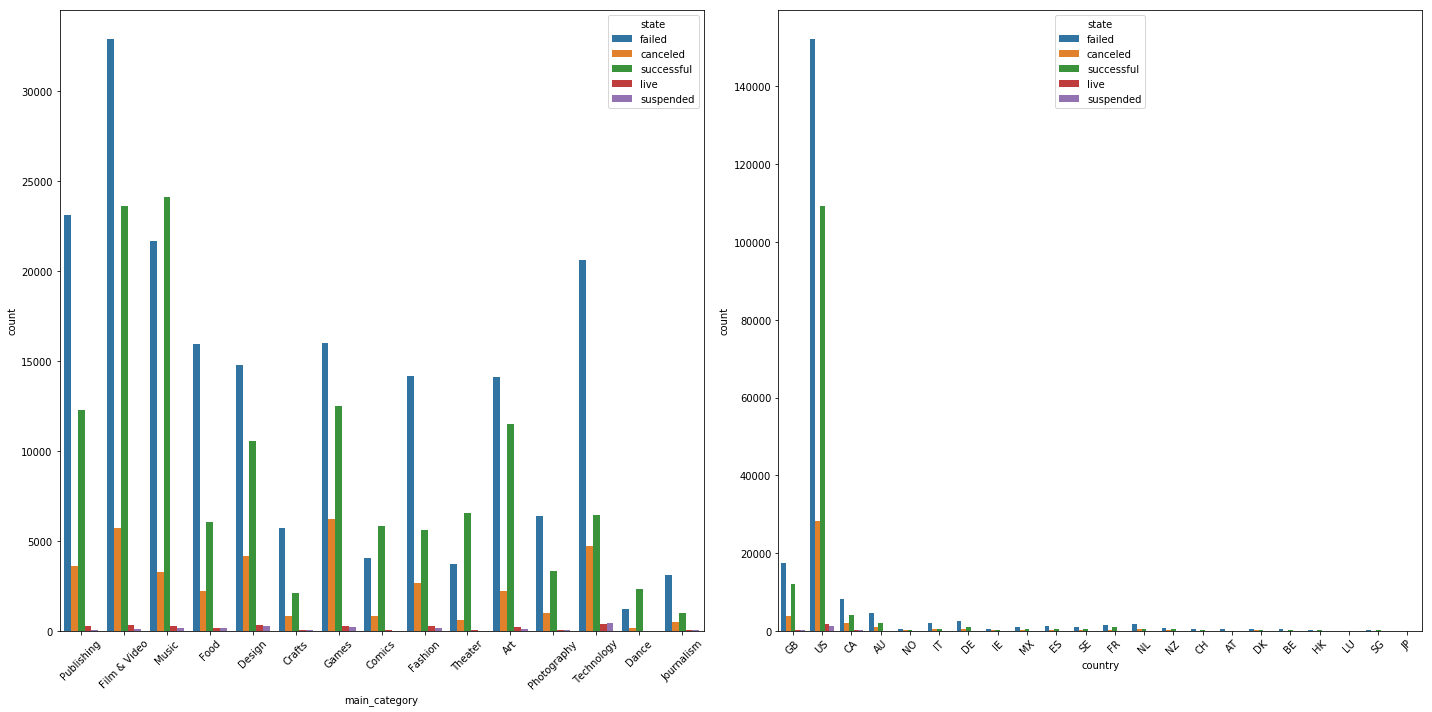

In [82]:
f, (ax1,ax2) = plt.subplots(1, 2,figsize=(20,10))

sns.countplot(data=non_nan_df, x="main_category", hue="state", ax=ax1)
ax1.set_xticklabels(labels=non_nan_df.main_category.unique(),rotation=45)

sns.countplot(data=non_nan_df, x="country", hue="state", ax=ax2)
ax2.set_xticklabels(labels=non_nan_df.country.unique(),rotation=45)


f.tight_layout()
plt.show()

## Consider Successful kickstarters only

In [0]:
successful_df = non_nan_df[non_nan_df.state == "successful"]

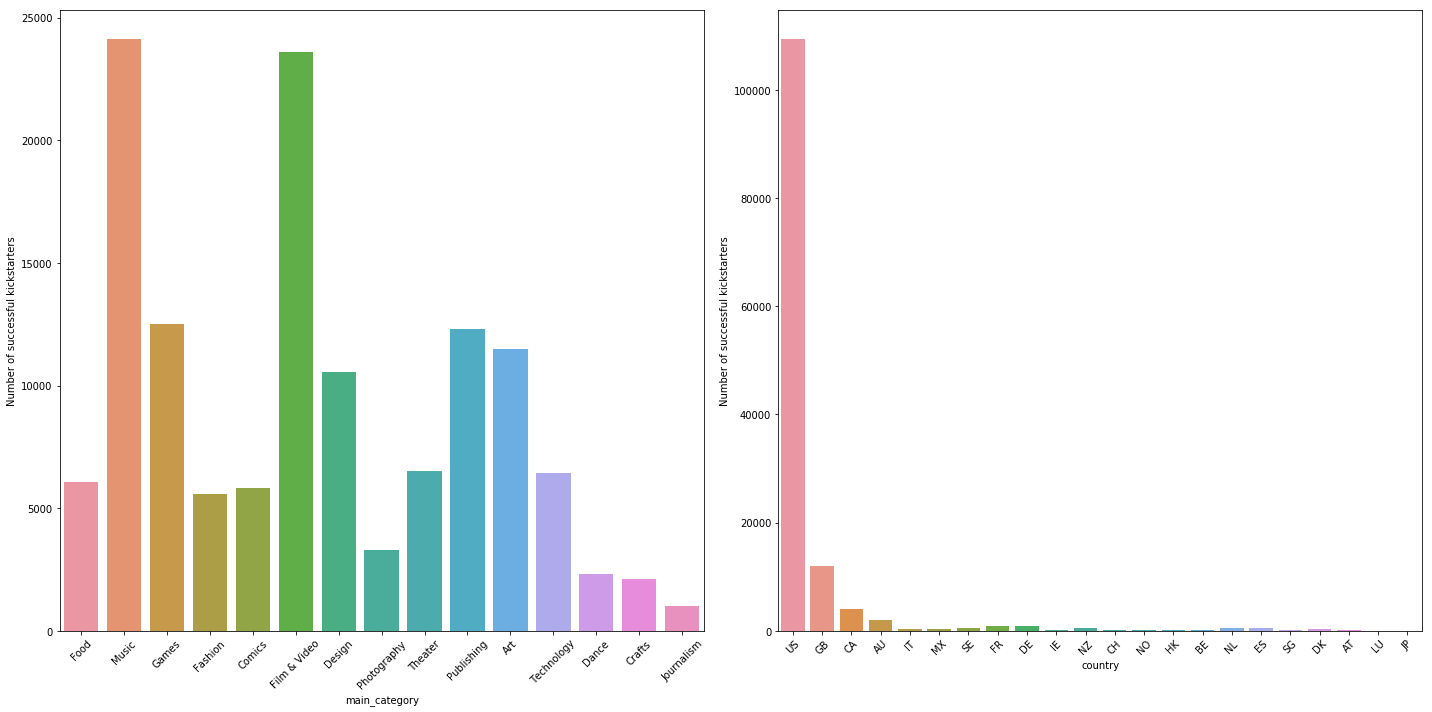

In [87]:
f, (ax1,ax2) = plt.subplots(1, 2,figsize=(20,10))

sns.countplot(data=successful_df, x="main_category", ax=ax1)
ax1.set_xticklabels(labels=successful_df.main_category.unique(),rotation=45)
ax1.set_ylabel("Number of successful kickstarters")

sns.countplot(data=successful_df, x="country", ax=ax2)
ax2.set_xticklabels(labels=successful_df.country.unique(),rotation=45)
ax2.set_ylabel("Number of successful kickstarters")



f.tight_layout()
plt.show()

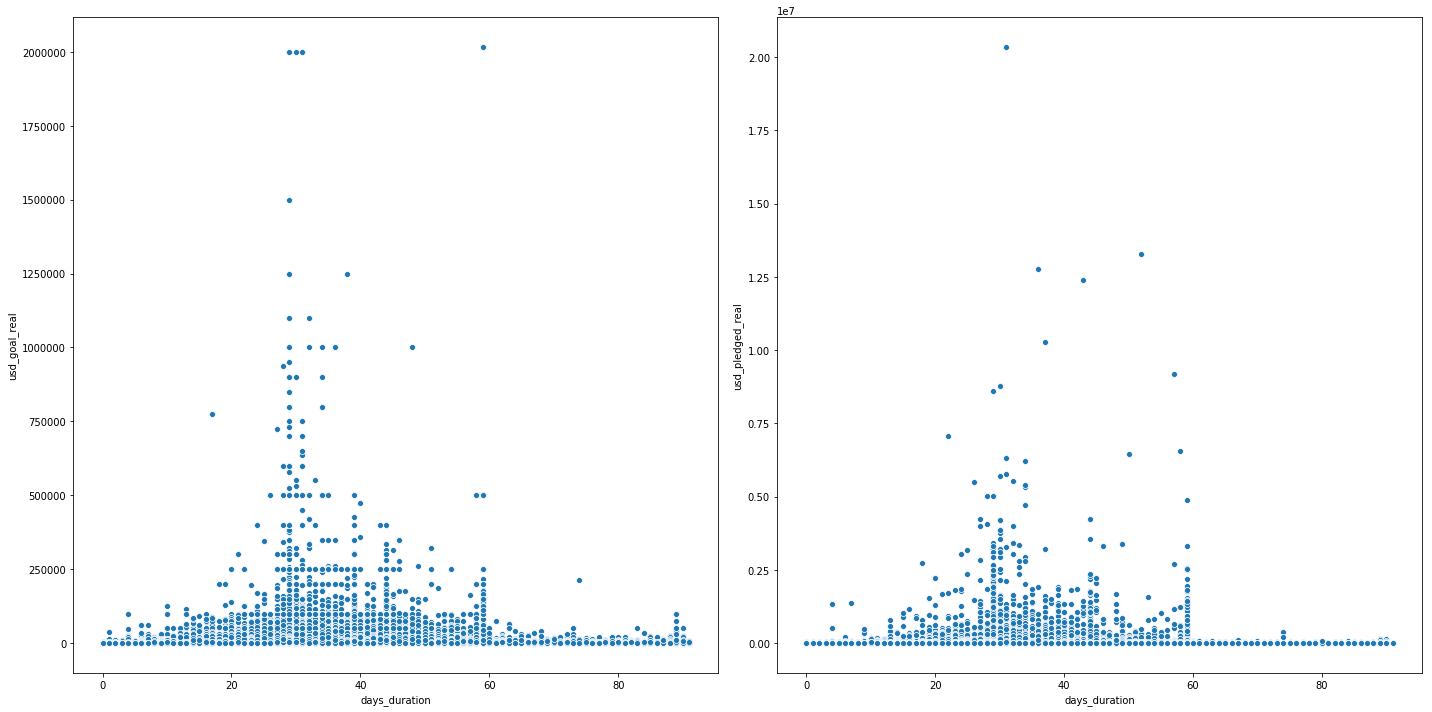

In [123]:
f, (ax1,ax2) = plt.subplots(1, 2,figsize=(20,10))

sns.scatterplot(data=successful_df, x="days_duration", y="usd_goal_real", ax=ax1)
ax1.set_ylabel("usd_goal_real")

sns.scatterplot(data=successful_df, x="days_duration", y="usd_pledged_real", ax=ax2)
ax2.set_ylabel("usd_pledged_real")

f.tight_layout()
plt.show()

Look like there are some outliers contained in *usd_goal_real* and *usd_pledged_real*

In [97]:
temp.head()

,days_duration,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_year,launched_month,launched_day,launched_hour,launched_minute,launched_date,launched_time,deadline_year,deadline_month,deadline_day,deadline_date,deadline_time,duration
0,0,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35
1,1,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55
2,2,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70
3,3,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83
4,4,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194


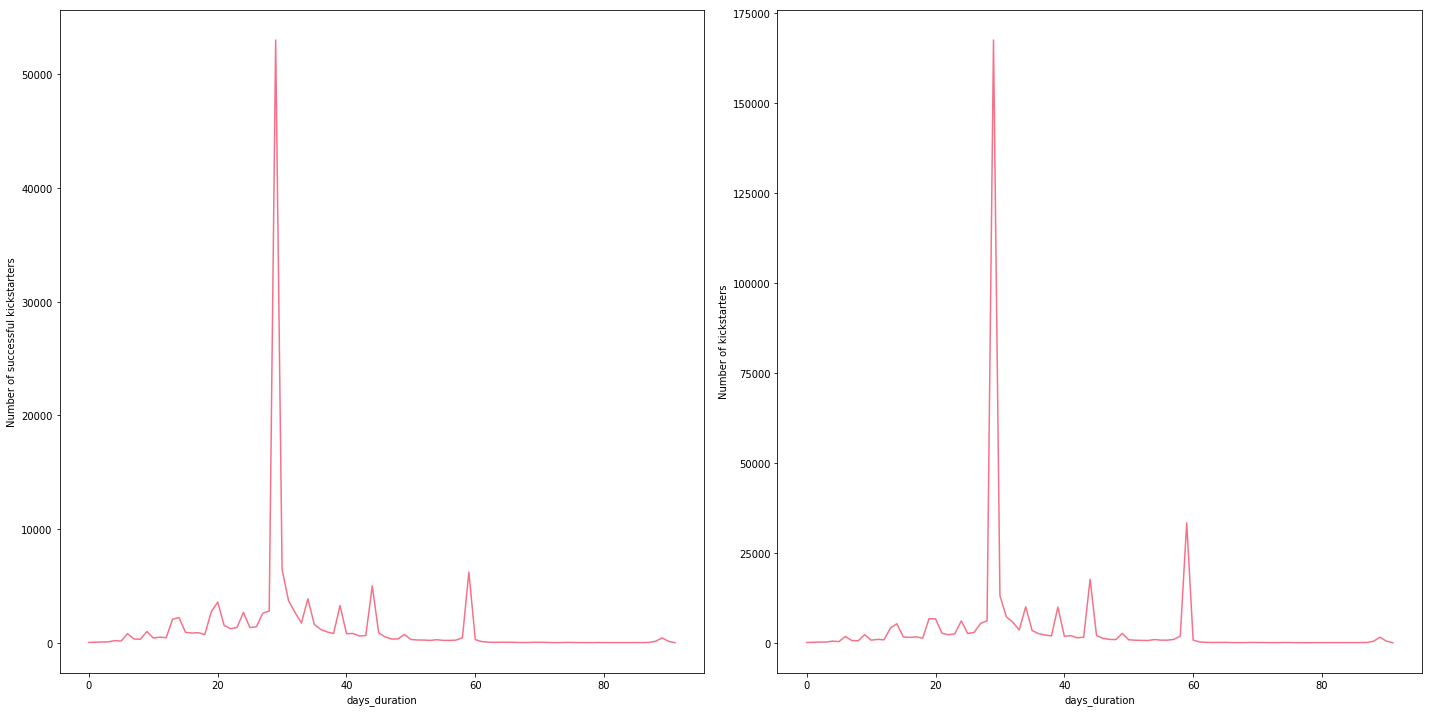

In [147]:
f, (ax1,ax2) = plt.subplots(1, 2,figsize=(20,10))

temp=successful_df.groupby(by=["days_duration"]).count()
temp.reset_index(level=0, inplace=True)
sns.lineplot(data=temp, x="days_duration", y="usd_goal_real", ax=ax1)
ax1.set_ylabel("Number of successful kickstarters")

temp=non_nan_df.groupby(by=["days_duration"]).count()
temp.reset_index(level=0, inplace=True)
sns.lineplot(data=temp, x="days_duration", y="usd_goal_real", ax=ax2)
ax2.set_ylabel("Number of kickstarters")


f.tight_layout()
plt.show()

In [120]:
temp=successful_df.groupby(by=["launched_month"]).count()
temp.reset_index(level=0, inplace=True)
temp

,launched_month,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_year,launched_day,launched_hour,launched_minute,launched_date,launched_time,deadline_year,deadline_month,deadline_day,deadline_date,deadline_time,days_duration,duration
0,1,9480,9480,9480,9480,9480,9480,9480,9480,9480,9480,9480,9480,9480,9480,9480,9480,9480,9480,9480,9480,9480,9480,9480,9480,9480,9480,9480,9480
1,2,11002,11002,11002,11002,11002,11002,11002,11002,11002,11002,11002,11002,11002,11002,11002,11002,11002,11002,11002,11002,11002,11002,11002,11002,11002,11002,11002,11002
2,3,12812,12812,12812,12812,12812,12812,12812,12812,12812,12812,12812,12812,12812,12812,12812,12812,12812,12812,12812,12812,12812,12812,12812,12812,12812,12812,12812,12812
3,4,12034,12034,12034,12034,12034,12034,12034,12034,12034,12034,12034,12034,12034,12034,12034,12034,12034,12034,12034,12034,12034,12034,12034,12034,12034,12034,12034,12034
4,5,12054,12054,12054,12054,12054,12054,12054,12054,12054,12054,12054,12054,12054,12054,12054,12054,12054,12054,12054,12054,12054,12054,12054,12054,12054,12054,12054,12054
5,6,11772,11772,11772,11772,11772,11772,11772,11772,11772,11772,11772,11772,11772,11772,11772,11772,11772,11772,11772,11772,11772,11772,11772,11772,11772,11772,11772,11772
6,7,11680,11680,11680,11680,11680,11680,11680,11680,11680,11680,11680,11680,11680,11680,11680,11680,11680,11680,11680,11680,11680,11680,11680,11680,11680,11680,11680,11680
7,8,10820,10820,10820,10820,10820,10820,10820,10820,10820,10820,10820,10820,10820,10820,10820,10820,10820,10820,10820,10820,10820,10820,10820,10820,10820,10820,10820,10820
8,9,11231,11231,11231,11231,11231,11231,11231,11231,11231,11231,11231,11231,11231,11231,11231,11231,11231,11231,11231,11231,11231,11231,11231,11231,11231,11231,11231,11231
9,10,12350,12350,12350,12350,12350,12350,12350,12350,12350,12350,12350,12350,12350,12350,12350,12350,12350,12350,12350,12350,12350,12350,12350,12350,12350,12350,12350,12350


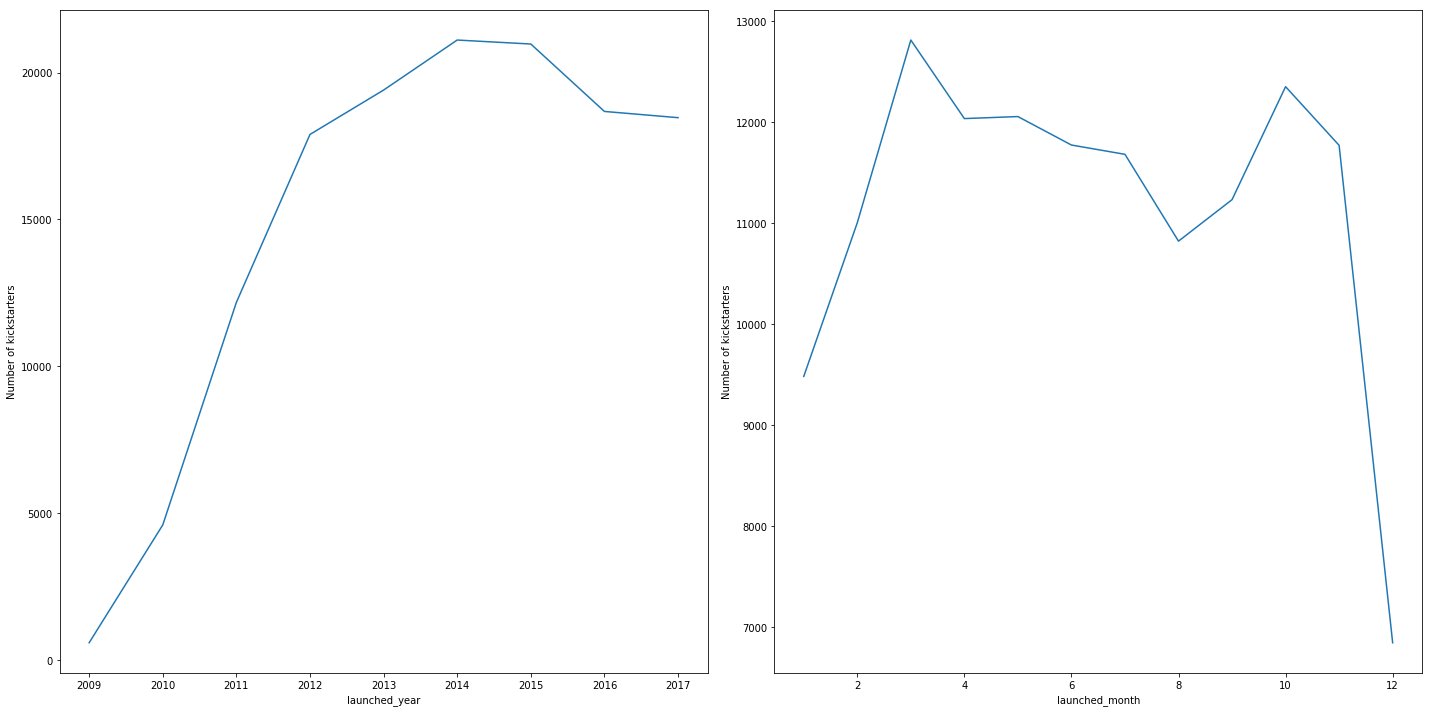

In [121]:
f, (ax1,ax2) = plt.subplots(1, 2,figsize=(20,10))

# .sort_values(by="launched_year",ascending=False)

temp=successful_df.groupby(by=["launched_year"]).count()
temp.reset_index(level=0, inplace=True)
sns.lineplot(data=temp, x="launched_year", y="usd_goal_real", ax=ax1)
ax1.set_ylabel("Number of kickstarters")

temp=successful_df.groupby(by=["launched_month"]).count()
temp.reset_index(level=0, inplace=True)
sns.lineplot(data=temp, x="launched_month", y="usd_pledged_real", ax=ax2)
ax2.set_ylabel("Number of kickstarters")

f.tight_layout()
plt.show()

In [128]:
temp=successful_df.groupby(by=["launched_year","launched_month"]).count()
temp.reset_index(level=[0,1], inplace=True)
temp.head()

,launched_year,launched_month,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_day,launched_hour,launched_minute,launched_date,launched_time,deadline_year,deadline_month,deadline_day,deadline_date,deadline_time,days_duration,duration
0,2009,4,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
1,2009,5,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
2,2009,6,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36
3,2009,7,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32
4,2009,8,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51


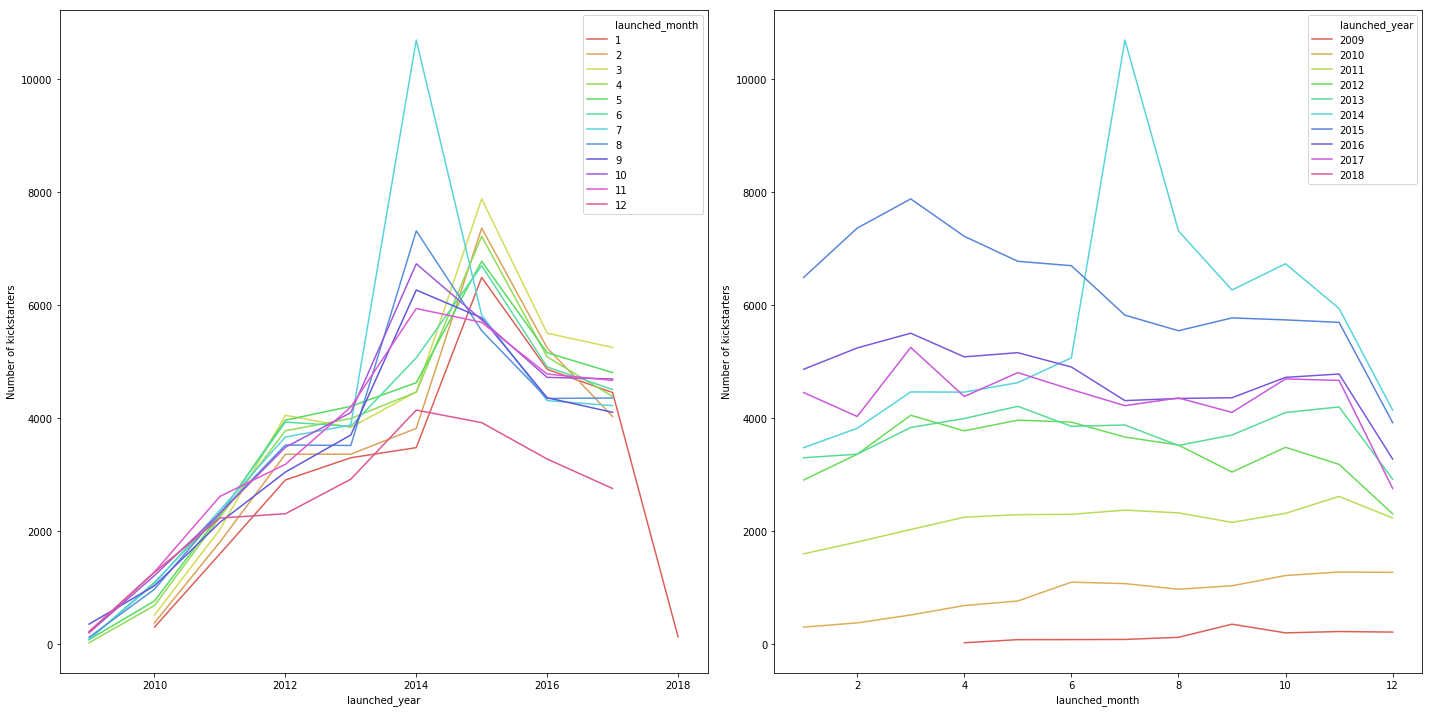

In [139]:
f, (ax1,ax2) = plt.subplots(1, 2,figsize=(20,10))

# .sort_values(by="launched_year",ascending=False)
temp=non_nan_df.groupby(by=["launched_year","launched_month"]).count()
temp.reset_index(level=[0,1], inplace=True)
sns.lineplot(data=temp, x="launched_year", y="usd_goal_real", hue="launched_month",ax=ax1, palette=sns.color_palette("hls", len(temp.launched_month.unique())))
ax1.set_ylabel("Number of kickstarters")

sns.lineplot(data=temp, x="launched_month", y="usd_goal_real", hue="launched_year", ax=ax2, palette=sns.color_palette("hls", len(temp.launched_year.unique())))
ax2.set_ylabel("Number of kickstarters")

f.tight_layout()
plt.show()

in the year 2014, the number of kickstarters increased

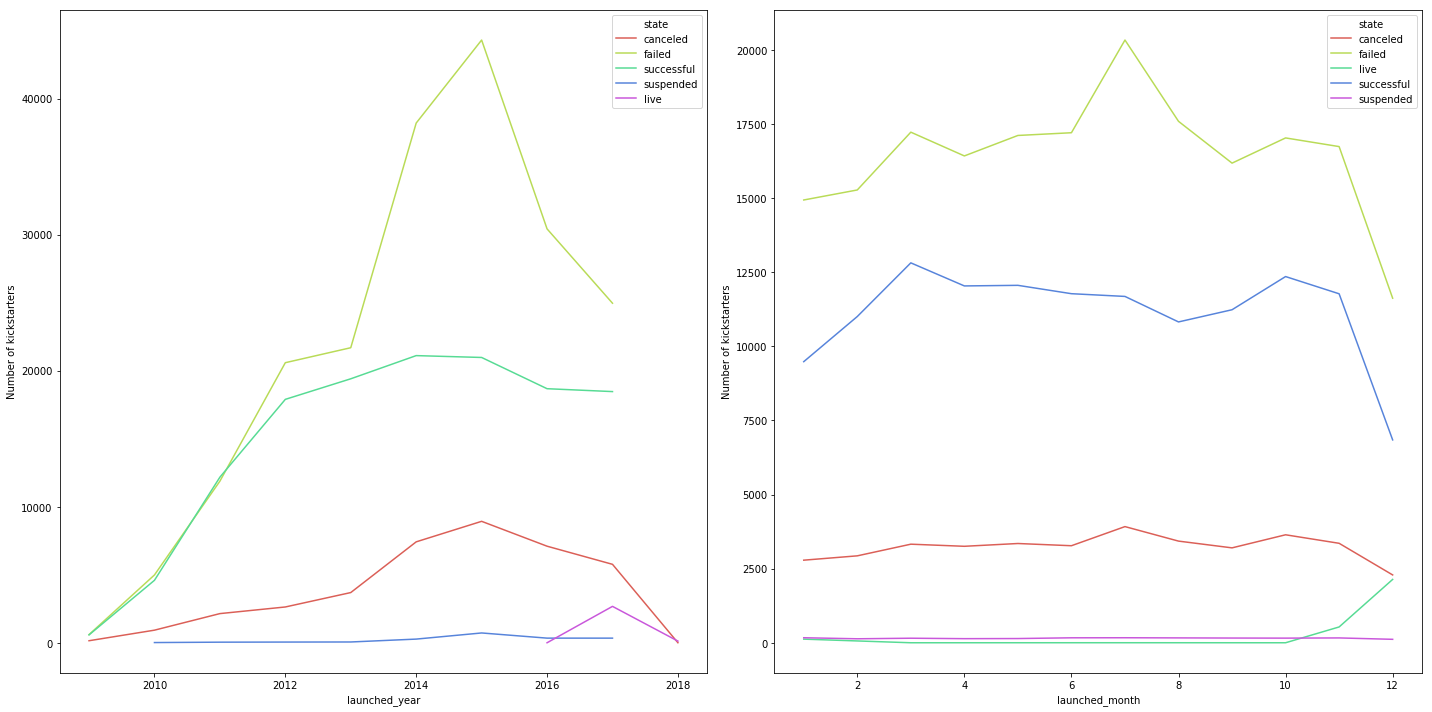

In [143]:
f, (ax1,ax2) = plt.subplots(1, 2,figsize=(20,10))

# .sort_values(by="launched_year",ascending=False)
temp=non_nan_df.groupby(by=["launched_year","state"]).count()
temp.reset_index(level=[0,1], inplace=True)
sns.lineplot(data=temp, x="launched_year", y="usd_goal_real", hue="state",ax=ax1, palette=sns.color_palette("hls", len(temp.state.unique())))
ax1.set_ylabel("Number of kickstarters")

temp=non_nan_df.groupby(by=["launched_month","state"]).count()
temp.reset_index(level=[0,1], inplace=True)
sns.lineplot(data=temp, x="launched_month", y="usd_goal_real", hue="state", ax=ax2, palette=sns.color_palette("hls", len(temp.state.unique())))
ax2.set_ylabel("Number of kickstarters")

f.tight_layout()
plt.show()

Number of successful kickstarters remains after years.

the trend of successful & failed kickstarters are the similar.

After year, the number of kickstarters has increased a lots, however, the rate to be succeeded are lower.

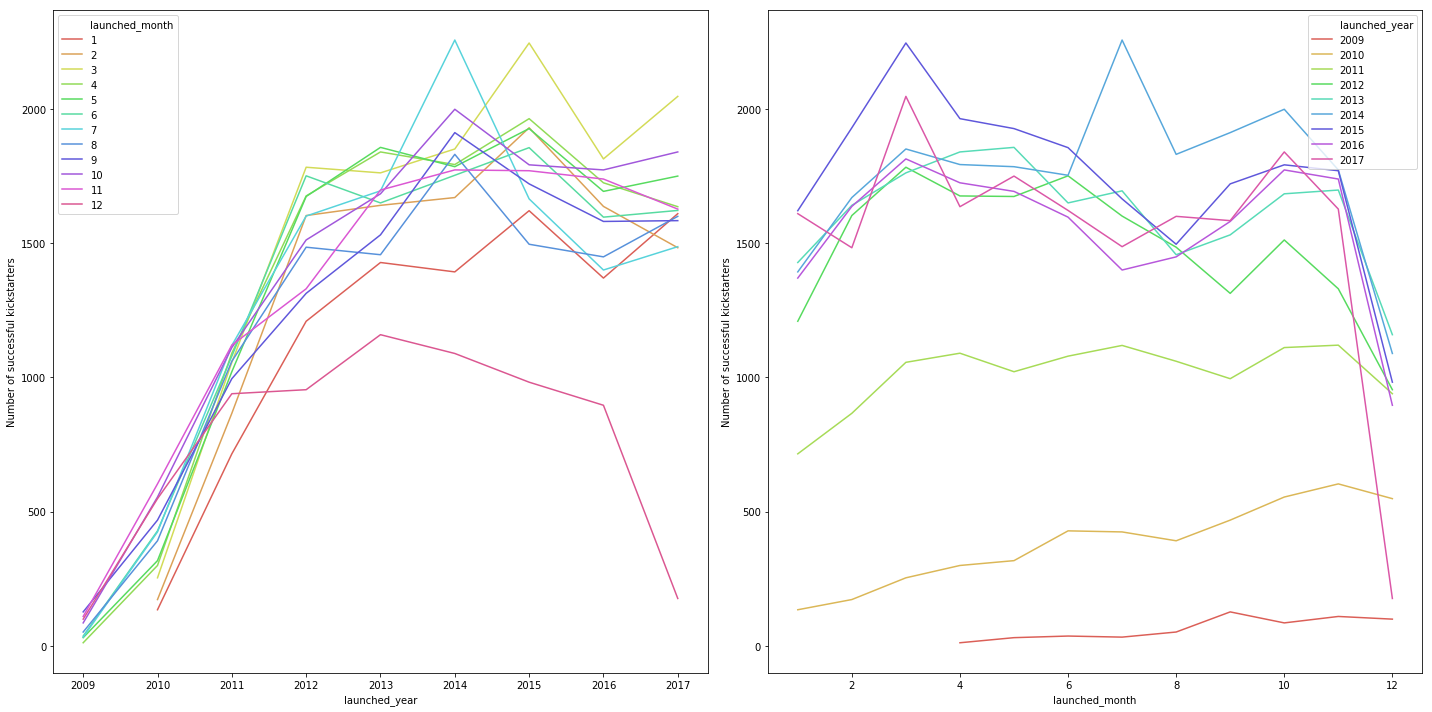

In [140]:
f, (ax1,ax2) = plt.subplots(1, 2,figsize=(20,10))

# .sort_values(by="launched_year",ascending=False)
temp=successful_df.groupby(by=["launched_year","launched_month"]).count()
temp.reset_index(level=[0,1], inplace=True)
sns.lineplot(data=temp, x="launched_year", y="usd_goal_real", hue="launched_month",ax=ax1, palette=sns.color_palette("hls", len(temp.launched_month.unique())))
ax1.set_ylabel("Number of successful kickstarters")

sns.lineplot(data=temp, x="launched_month", y="usd_goal_real", hue="launched_year", ax=ax2, palette=sns.color_palette("hls", len(temp.launched_year.unique())))
ax2.set_ylabel("Number of successful kickstarters")

f.tight_layout()
plt.show()

Somehow, the successful rate decreased in the end of the years.

## Let's consider the trend of kickstarters by evaluating the category

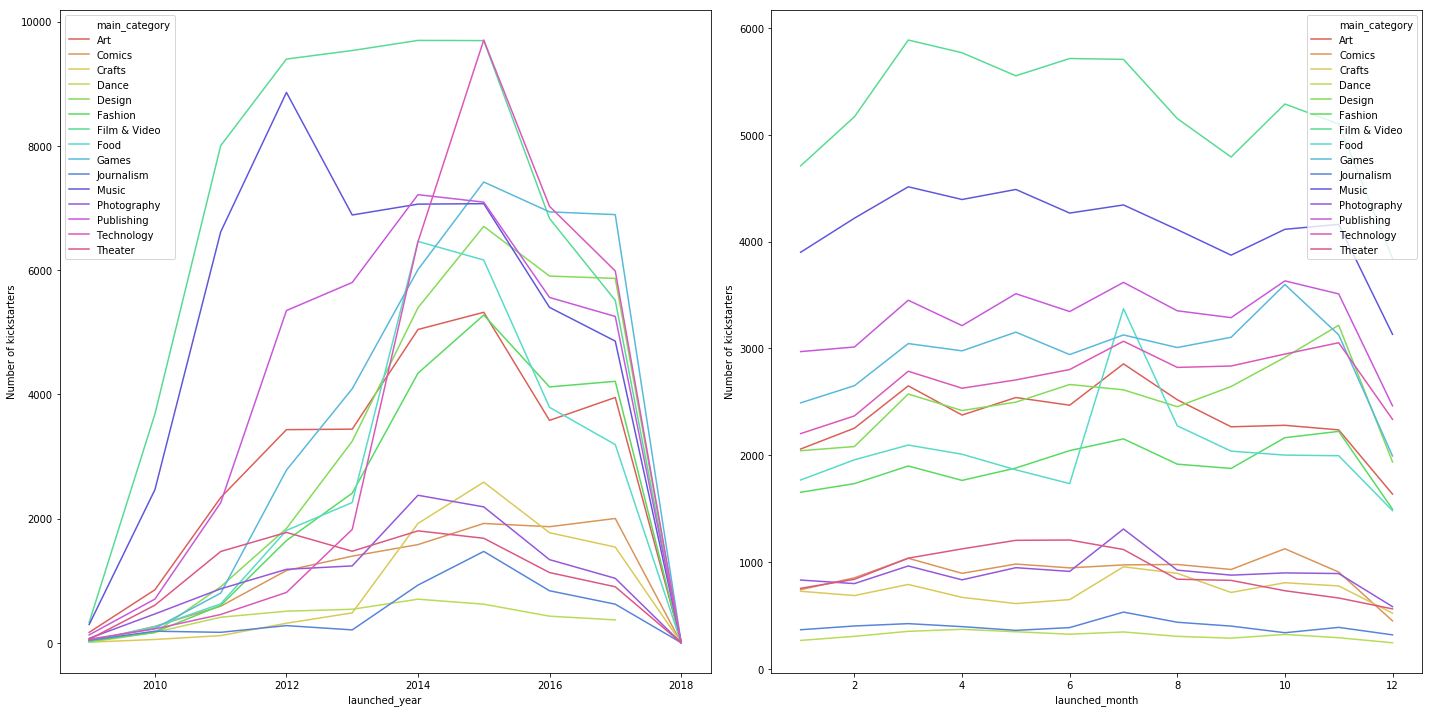

In [145]:
f, (ax1,ax2) = plt.subplots(1, 2,figsize=(20,10))

# .sort_values(by="launched_year",ascending=False)
temp=non_nan_df.groupby(by=["launched_year","main_category"]).count()
temp.reset_index(level=[0,1], inplace=True)
sns.lineplot(data=temp, x="launched_year", y="usd_goal_real", hue="main_category",ax=ax1, palette=sns.color_palette("hls", len(temp.main_category.unique())))
ax1.set_ylabel("Number of kickstarters")

temp=non_nan_df.groupby(by=["launched_month","main_category"]).count()
temp.reset_index(level=[0,1], inplace=True)
sns.lineplot(data=temp, x="launched_month", y="usd_goal_real", hue="main_category", ax=ax2, palette=sns.color_palette("hls", len(temp.main_category.unique())))
ax2.set_ylabel("Number of kickstarters")

f.tight_layout()
plt.show()